In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics

In [2]:
df=pd.read_csv('synthdata.csv')

In [3]:
df.head()

Unnamed: 0                        Timestamp    Name   \
0           0   2022/03/18 9:10:38 AM GMT+5:30  Meghana   
1           1   2022/03/18 9:56:47 AM GMT+5:30  Akshaya   
2           2   2022/03/18 1:01:58 AM GMT+5:30  Mounika   
3           3   2022/03/18 9:56:47 AM GMT+5:30  Akshaya   
4           4  2022/03/19 10:43:00 AM GMT+5:30    Rohit   

                         College name   Your Stream  \
0                                 IIPR   Humanities   
1                   Anurag University   Engineering   
2                     Stanley college   Engineering   
3                   Anurag University   Engineering   
4  Neil Gogte Institute of Technology   Engineering   

  Enter your cgpa in secondary education  Enter your GPA in Mathematics   \
0                                     9.3                              9   
1                                     9.7                             10   
2                                     9.2                              9   
3                                     9.7                             10   
4                                     9.5                              9   

  Enter your GPA in Physics and Chemistry  Enter your GPA in Biology   \
0                                        8                          8   
1                                    10,10                         10   
2                                        9                          9   
3                                    10,10                         10   
4                                        9                          9   

  Enter your GPA in Social Studies   ... Do you like meeting new people?  \
0                                 9  ...                             Yes   
1                                10  ...                             Yes   
2                                10  ...                             Yes   
3                                10  ...                              No   
4                                 9  ...                             Yes   

  Do you like solving complex problems?  \
0                                    No   
1                                    No   
2                                    No   
3                                   Yes   
4                                   Yes   

  Does your stream have government job opportunities Rate your sports skills  \
0                                                Low                       2   
1                                               Many                       4   
2                                               Many                       3   
3                                               Many                       4   
4                                           Somewhat                       3   

  At what rate you are interested in logical thinking  \
0                                                  4    
1                                                  5    
2                                                  3    
3                                                  5    
4                                                  3    

   Rate your public speaking skills  \
0                                 3   
1                                 4   
2                                 4   
3                                 4   
4                                 2   

   How often do you spend with your friends daily?  How often do you travel?  \
0                                       Very Often                 Sometimes   
1                                       Very Often                 Sometimes   
2                                        Sometimes                    Rarely   
3                                       Very Often                 Sometimes   
4                                        Sometimes                    Rarely   

  How frequent you used to participate in extra- curricular activities?  \
0                                             Rarely                      
1              

In [4]:
df.shape

(5000, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Unnamed: 0                                                             5000 non-null   int64 
 1   Timestamp                                                              5000 non-null   object
 2   Name                                                                   5000 non-null   object
 3   College name                                                           5000 non-null   object
 4   Your Stream                                                            5000 non-null   object
 5   Enter your cgpa in secondary education                                 5000 non-null   object
 6   Enter your GPA in Mathematics                                          4982 non-null   object
 7

In [6]:
df.rename(columns=lambda x: x.strip())

Unnamed: 0                        Timestamp             Name  \
0              0   2022/03/18 9:10:38 AM GMT+5:30          Meghana   
1              1   2022/03/18 9:56:47 AM GMT+5:30          Akshaya   
2              2   2022/03/18 1:01:58 AM GMT+5:30          Mounika   
3              3   2022/03/18 9:56:47 AM GMT+5:30          Akshaya   
4              4  2022/03/19 10:43:00 AM GMT+5:30            Rohit   
...          ...                              ...              ...   
4995        4995   2022/03/18 4:05:31 PM GMT+5:30  Abilash Aluvala   
4996        4996   2022/03/18 4:05:31 PM GMT+5:30  Abilash Aluvala   
4997        4997   2022/03/18 4:05:31 PM GMT+5:30  Abilash Aluvala   
4998        4998  2022/03/18 12:32:19 AM GMT+5:30           Hrudya   
4999        4999  2022/03/18 10:52:01 PM GMT+5:30            Nissi   

                             College name  Your Stream  \
0                                    IIPR   Humanities   
1                      Anurag University   Engineering   
2                        Stanley college   Engineering   
3                      Anurag University   Engineering   
4     Neil Gogte Institute of Technology   Engineering   
...                                   ...          ...   
4995         Anurag group of institutions  Engineering   
4996         Anurag group of institutions  Engineering   
4997         Anurag group of institutions  Engineering   
4998                                 STLW  Engineering   
4999                            Chaitanya      Medical   

     Enter your cgpa in secondary education Enter your GPA in Mathematics  \
0                                       9.3                             9   
1                                       9.7                            10   
2                                       9.2                             9   
3                                       9.7                            10   
4                                       9.5                             9   
...                                     ...                           ...   
4995                                   93.8                          10.0   
4996                                   93.8                          10.0   
4997                                   93.8                          10.0   
4998                                    9.8                             9   
4999                                    9.2                             8   

     Enter your GPA in Physics and Chemistry Enter your GPA in Biology  \
0                                          8                         8   
1                                      10,10                        10   
2                                          9                         9   
3                                      10,10                        10   
4                                          9                         9   
...                                      ...                       ...   
4995                                      10                      10.0   
4996                                      10                      10.0   
4997                                      10                      10.0   
4998                                      10                        10   
4999                                       9                         9   

     Enter your GPA in Social Studies  ... Do you like meeting new people?  \
0                                   9  ...                             Yes   
1                                  10  ...                             Yes   
2                                  10  ...                             Yes   
3                                  10  ...                              No   
4                                   9  ...                             Yes   
...                               ...  ...                             ...   
4995                              9.0  ...                             Yes   
4996                          

In [7]:
df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

In [8]:
df.isnull().sum()

Your Stream                                                               0
Enter your cgpa in secondary education                                    0
Enter your GPA in Mathematics                                            18
Enter your GPA in Physics and Chemistry                                  18
Enter your GPA in Biology                                                24
Enter your GPA in Social Studies                                         24
Enter your gpa in English                                                18
Do you have any ncc participation?                                        1
Do you like meeting new people?                                           0
Do you like solving complex problems?                                    11
Does your stream have government job opportunities                        0
Rate your sports skills                                                   0
At what rate you are interested in logical thinking                       0
Rate your pu

In [9]:
df=df.drop_duplicates()

In [10]:
df=df.dropna()

In [11]:
df.shape

(301, 18)

In [12]:
df.isnull().sum()

Your Stream                                                              0
Enter your cgpa in secondary education                                   0
Enter your GPA in Mathematics                                            0
Enter your GPA in Physics and Chemistry                                  0
Enter your GPA in Biology                                                0
Enter your GPA in Social Studies                                         0
Enter your gpa in English                                                0
Do you have any ncc participation?                                       0
Do you like meeting new people?                                          0
Do you like solving complex problems?                                    0
Does your stream have government job opportunities                       0
Rate your sports skills                                                  0
At what rate you are interested in logical thinking                      0
Rate your public speaking

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
df['Do you have any ncc participation?']=label_encoder.fit_transform(df['Do you have any ncc participation?'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'No': 0, 'Yes': 1}


In [15]:
df['Do you like solving complex problems?']=label_encoder.fit_transform(df['Do you like solving complex problems?'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'No': 0, 'Yes': 1}


In [16]:
df['Does your stream have government job opportunities']=label_encoder.fit_transform(df['Does your stream have government job opportunities'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'Low': 0, 'Many': 1, 'Somewhat': 2}


In [17]:
df['How often do you spend with your friends daily?']=label_encoder.fit_transform(df['How often do you spend with your friends daily?'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'Always': 0, 'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Very Often': 4}


In [18]:
df['How often do you travel?']=label_encoder.fit_transform(df['How often do you travel?'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'Always': 0, 'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Very Often': 4}


In [19]:
df['How frequent you used to participate in extra- curricular activities?']=label_encoder.fit_transform(df['How frequent you used to participate in extra- curricular activities?'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'Always': 0, 'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Very Often': 4}


In [20]:
df['Your Stream']=label_encoder.fit_transform(df['Your Stream'])
lmapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(lmapping)

{' MSc Microbiology ': 0, 'Arts': 1, 'B. Sc genetics and biotechnology ': 2, 'Bsc.Foodscience': 3, 'Commerce': 4, 'Designing': 5, 'Diploma': 6, 'Engineering': 7, 'Humanities': 8, 'Management studies ': 9, 'Medical': 10, 'Science': 11, 'Science ': 12}


In [21]:
df['Do you like meeting new people?']=label_encoder.fit_transform(df['Do you like meeting new people?'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'No': 0, 'Yes': 1}


In [22]:
df

Your Stream Enter your cgpa in secondary education   \
0               8                                     9.3   
1               7                                     9.7   
2               7                                     9.2   
3               7                                     9.7   
4               7                                     9.5   
...           ...                                     ...   
4988            7                                     9.8   
4989            7                                     9.8   
4990            7                                     9.7   
4992            6                                     8.8   
4995            7                                    93.8   

     Enter your GPA in Mathematics  Enter your GPA in Physics and Chemistry   \
0                                 9                                        8   
1                                10                                    10,10   
2                                 9                                        9   
3                                10                                    10,10   
4                                 9                                        9   
...                             ...                                      ...   
4988                            9.0                                       10   
4989                           10.0                                       10   
4990                           10.0                                       10   
4992                            9.0                                       10   
4995                           10.0                                       10   

     Enter your GPA in Biology  Enter your GPA in Social Studies   \
0                             8                                 9   
1                            10                                10   
2                             9                                10   
3                            10                                10   
4                             9                                 9   
...                         ...                               ...   
4988                       10.0                              10.0   
4989                       10.0                              10.0   
4990                       10.0                              10.0   
4992                       10.0                               9.0   
4995                       10.0                               9.0   

     Enter your gpa in English   Do you have any ncc participation?  \
0                            10                                   0   
1                            10                                   0   
2                             8                                   0   
3                            10                                   0   
4                             8                                   0   
...                         ...                                 ...   
4988                       10.0                                   1   
4989                       10.0                                   0   
4990                       10.0                                   0   
4992                        8.0                                   0   
4995                        9.0                                   0   

      Do you like meeting new people?  Do you like solving complex problems?  \
0                                   1                                      0   
1                                   1                                      0   
2                                   1                                      0   
3                                   0                                      1   
4                                   1                                      1   
...                               ...                                    ...   
4988                                1                                 

In [23]:
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [24]:
df.shape

(258, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 0 to 4995
Data columns (total 18 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Your Stream                                                            258 non-null    int32  
 1   Enter your cgpa in secondary education                                 258 non-null    float64
 2   Enter your GPA in Mathematics                                          258 non-null    float64
 3   Enter your GPA in Physics and Chemistry                                258 non-null    float64
 4   Enter your GPA in Biology                                              258 non-null    float64
 5   Enter your GPA in Social Studies                                       258 non-null    float64
 6   Enter your gpa in English                                              258 non-null    float64

In [26]:
df = df.drop(df[df['At what rate are you satisfied in your current stream?'] < 3].index)

In [27]:
df=df.drop(['At what rate are you satisfied in your current stream?'],axis=1)

In [28]:
df.shape

(232, 17)

In [29]:
X=df.drop(labels=['Your Stream'], axis=1)
y=df['Your Stream'].values

In [30]:
X

Enter your cgpa in secondary education   Enter your GPA in Mathematics   \
0                                         9.3                             9.0   
4                                         9.5                             9.0   
6                                         9.0                             9.0   
7                                         9.3                             9.0   
8                                         9.5                            10.0   
...                                       ...                             ...   
4987                                      8.3                             9.0   
4988                                      9.8                             9.0   
4990                                      9.7                            10.0   
4992                                      8.8                             9.0   
4995                                     93.8                            10.0   

      Enter your GPA in Physics and Chemistry   Enter your GPA in Biology   \
0                                          8.0                         8.0   
4                                          9.0                         9.0   
6                                          9.0                         9.0   
7                                          9.0                         9.0   
8                                         10.0                        10.0   
...                                        ...                         ...   
4987                                       9.0                         9.0   
4988                                      10.0                        10.0   
4990                                      10.0                        10.0   
4992                                      10.0                        10.0   
4995                                      10.0                        10.0   

      Enter your GPA in Social Studies   Enter your gpa in English   \
0                                   9.0                        10.0   
4                                   9.0                         8.0   
6                                   9.0                         9.0   
7                                  10.0                         9.0   
8                                   9.0                        10.0   
...                                 ...                         ...   
4987                                8.0                         8.0   
4988                               10.0                        10.0   
4990                               10.0                        10.0   
4992                                9.0                         8.0   
4995                                9.0                         9.0   

      Do you have any ncc participation?  Do you like meeting new people?  \
0                                      0                                1   
4                                      0                                1   
6                                      0                                1   
7                                      0                                0   
8                                      0                                0   
...                                  ...                              ...   
4987                                   0                                1   
4988                                   1                                1   
4990                                   0                                1   
4992                                   0                                1   
4995                                   0                                1   

      Do you like solving complex problems?  \
0                                         0   
4                                         1   
6                                         1   
7                                         0   
8                                         1   
...                                 

In [31]:
y

array([ 8,  7,  7, 11,  7,  7,  7,  7,  1,  4,  7, 10,  7,  7,  7, 10,  7,
        7,  7,  1,  7, 10,  7,  4,  7,  7,  7,  4, 10,  7,  7,  0,  7,  6,
        7,  7,  7,  7,  8,  7, 10,  7,  7,  7, 10, 10, 10,  7,  7,  7,  7,
        7,  1,  7,  7, 10, 10,  7, 10,  1, 10,  7,  7,  7,  7,  7,  7,  7,
        7,  0,  1,  7,  7,  7,  7, 10,  7,  7,  1,  7, 10, 10, 12,  9, 12,
        2,  7,  7, 10,  1,  7,  7,  7,  7,  1,  2,  1,  7,  7, 10,  7,  7,
        1,  7, 12,  6,  7,  7,  6, 10,  2,  0,  7,  7, 10,  7,  7,  7,  7,
        8,  7,  7,  7,  7, 10,  7, 10,  7,  7,  7,  1,  7, 11,  7,  7,  1,
        6,  7,  7,  9,  7,  7,  7,  7,  7,  7,  6,  7,  4,  7,  1,  7,  7,
        7,  1,  6,  1,  7,  7,  7,  7,  7,  7,  7,  7,  2,  7, 10, 12,  7,
        7, 10,  7,  7,  7,  7,  8,  7, 10,  7,  7,  7,  1,  1,  2,  7, 10,
       11,  7,  7,  1,  7,  7,  7,  7,  7, 12,  7,  7,  7,  1,  7,  7,  7,
        7,  7,  7,  8,  4,  7,  7, 10, 10,  8, 10,  7,  7, 10,  7,  7,  7,
        7, 11, 10,  7,  1

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
X_train

Enter your cgpa in secondary education   Enter your GPA in Mathematics   \
1460                                      9.0                             9.0   
67                                        9.2                             8.0   
27                                        9.5                             9.0   
902                                       9.3                             9.0   
1035                                      9.5                            10.0   
...                                       ...                             ...   
3983                                      9.7                            10.0   
1197                                      9.0                            10.0   
358                                       8.7                             9.0   
1350                                      9.8                             9.0   
110                                       9.0                            10.0   

      Enter your GPA in Physics and Chemistry   Enter your GPA in Biology   \
1460                                       9.0                         9.0   
67                                         9.0                         9.0   
27                                         9.0                         9.0   
902                                        8.0                         8.0   
1035                                       9.0                         9.0   
...                                        ...                         ...   
3983                                       9.0                         9.0   
1197                                       8.0                         8.0   
358                                        8.0                         7.0   
1350                                      10.0                        10.0   
110                                        9.0                         9.0   

      Enter your GPA in Social Studies   Enter your gpa in English   \
1460                                9.0                         9.0   
67                                  8.0                         9.0   
27                                  9.0                         8.0   
902                                 9.0                        10.0   
1035                                9.0                        10.0   
...                                 ...                         ...   
3983                               10.0                        10.0   
1197                                8.0                        10.0   
358                                 9.0                         8.0   
1350                               10.0                        10.0   
110                                 8.0                         8.0   

      Do you have any ncc participation?  Do you like meeting new people?  \
1460                                   0                                0   
67                                     0                                1   
27                                     0                                1   
902                                    0                                0   
1035                                   0                                1   
...                                  ...                              ...   
3983                                   0                                1   
1197                                   0                                0   
358                                    1                                0   
1350                                   0                                1   
110                                    0                                0   

      Do you like solving complex problems?  \
1460                                      1   
67                                        0   
27                                        0   
902                                       1   
1035                                      1   
...                                 

In [34]:
y_train

array([ 7, 10,  7,  8,  7,  7,  6,  2,  7,  7,  7,  4,  7, 10, 10,  7,  7,
        1,  7,  8,  7,  7,  7,  1,  1,  7,  7,  7,  7,  1, 10, 10,  1, 10,
        7,  7,  1,  2,  1,  7,  7,  7,  7,  7, 10,  7,  7,  7,  1,  7,  7,
        7,  7,  7,  7, 10,  8,  7,  7,  7,  6,  7,  1, 10,  7,  7, 11, 10,
        4,  1,  7, 10, 10,  1,  7,  7, 12,  7,  7,  8, 10,  7,  7,  7,  7,
        7,  7,  7, 10, 10,  7,  7,  7, 10,  7, 12,  1,  7,  7,  7, 10,  7,
        7, 10,  7,  7,  7,  7,  7,  6,  9,  2,  6,  7,  7,  4, 10,  4,  7,
       12,  7,  7,  1,  0,  7,  7, 10,  7,  7, 10, 10,  1,  7,  7,  7,  7,
       11,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  1, 10,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  1,  7,  7,  7,  7,  1,  9, 10,  6,  7,  7,
       10,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7])

In [35]:
X_test

Enter your cgpa in secondary education   Enter your GPA in Mathematics   \
4985                                     80.0                            87.0   
501                                       8.8                             8.0   
1943                                      9.8                             9.0   
359                                       7.5                            10.0   
743                                       9.3                             9.0   
506                                       8.0                             9.0   
449                                       9.5                             8.0   
869                                      90.0                             9.0   
4990                                      9.7                            10.0   
282                                       9.3                            10.0   
81                                       93.8                            10.0   
8                                         9.5                            10.0   
116                                       9.3                             9.0   
3594                                     90.0                             9.0   
71                                        6.8                             7.0   
4973                                      9.0                             9.0   
1859                                      9.7                            10.0   
1737                                      9.7                            10.0   
326                                       9.8                             9.0   
330                                       6.8                             7.0   
2468                                      9.3                             9.0   
1829                                      9.8                             8.0   
118                                       9.7                            10.0   
229                                       9.0                             7.0   
2123                                     93.8                            10.0   
1412                                      9.8                            10.0   
509                                       9.8                            10.0   
2973                                      9.7                            10.0   
870                                       9.8                             9.0   
3765                                      8.5                             8.0   
29                                        9.0                             9.0   
4400                                      8.2                             9.0   
451                                       9.3                             9.0   
986                                     901.0                             8.0   
30                                        7.0                             8.0   
4966                                      9.7                            10.0   
140                                       9.0                             7.0   
80                                        8.8                             9.0   
2039                                      9.7                            10.0   
82                                        9.3                            10.0   
19                                       50.0                            60.0   
68                                        9.7                            10.0   
0                                         9.3                             9.0   
4992                                      8.8                             9.0   
4978                                      9.3                             9.0   
1465                                      9.0                             9.0   
166                                       9.5                            10.0   

      Enter your GPA in Physics and Chemistry   Enter your GPA in Biology   \
4985                                   

In [36]:
y_test

array([ 1, 10,  7,  7,  2,  1, 12,  7,  7,  7,  7,  7,  8,  7,  0,  7,  7,
        7,  7,  0, 11, 12,  7, 10,  7,  7,  7,  7,  7,  7,  7,  4,  2, 10,
        1,  7, 10,  6,  7,  7, 10,  7,  8,  6, 11,  7,  7])

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics

In [38]:
results=[]

In [39]:
svm = SVC(kernel = 'linear', C = 1, gamma = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9574468085106383
[[ 2  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  1  0  0  1 24  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.92      0.96        26
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2

    accuracy                           0.96 

In [40]:
rclf = RandomForestClassifier(n_estimators=100,n_jobs=-1)  
rclf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9787234042553191
[[ 2  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       0.96      1.00      0.98        26
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2

    accuracy                           0.98 

In [41]:
y_pred

array([ 1, 10,  7,  7,  2,  1, 12,  7,  7,  7,  7,  7,  8,  7,  0,  7,  7,
        7,  7,  0,  7, 12,  7, 10,  7,  7,  7,  7,  7,  7,  7,  4,  2, 10,
        1,  7, 10,  6,  7,  7, 10,  7,  8,  6, 11,  7,  7])

In [42]:
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9574468085106383
[[ 2  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  1  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.96      0.98        26
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2

    accuracy                           0.96 

In [43]:
knn = KNeighborsClassifier()  
knn .fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.723404255319149
[[ 0  2  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0 22  0  4  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  3  0  2  0  0]
 [ 0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.79      0.85      0.81        26
           8       1.00      1.00      1.00         2
          10       0.29      0.40      0.33         5
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2

    accuracy                           0.72  

C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5957446808510638
[[ 0  2  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  2  0 20  0  4  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  1  0  0  0  3  0  1  0  0]
 [ 0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.33      0.29         3
           2       1.00      0.50      0.67         2
           4       0.14      1.00      0.25         1
           6       1.00      1.00      1.00         2
           7       0.77      0.77      0.77        26
           8       1.00      1.00      1.00         2
          10       0.20      0.20      0.20         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2

    accuracy                           0.60 

C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
# accuracy=metrics.accuracy_score(y_test, y_pred)
# results.append(accuracy)

In [46]:
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5957446808510638
[[ 0  2  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         3
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.96      0.98        26
           8       1.00      1.00      1.00         2
          10       0.83      1.00      0.91         5
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2

    accuracy                           0.91 

C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7872340425531915
[[ 0  2  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  2  0  3  0  0]
 [ 0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.79      1.00      0.88        26
           8       1.00      1.00      1.00         2
          10       0.75      0.60      0.67         5
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2

    accuracy                           0.79 

C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-def

In [48]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6808510638297872
[[ 0  0  0  0  0  0  0  2  0  0]
 [ 0  2  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  2  0  3  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80        26
           8       0.00      0.00      0.00         2
          10       0.60      0.60      0.60         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2

    accuracy                           0.68 

C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetri

Accuracies: [0.9574468085106383, 0.9787234042553191, 0.9574468085106383, 0.723404255319149, 0.5957446808510638, 0.7872340425531915, 0.6808510638297872]


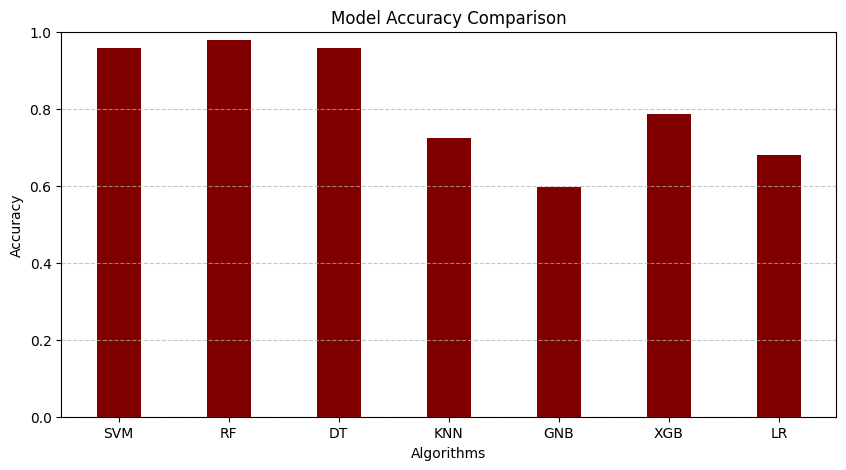

In [52]:
import matplotlib.pyplot as plt

# Your results list should already be populated at this point
print("Accuracies:", results)

# Define all algorithm names
algorithms = ['SVM', 'RF', 'DT', 'KNN', 'GNB', 'XGB', 'LR', 'Neural Network']

# Trim or match algorithms to results to avoid shape mismatch
if len(results) != len(algorithms):
    print(f"Warning: {len(results)} results found, but {len(algorithms)} algorithms. Trimming to match.")
    algorithms = algorithms[:len(results)]

# Create the bar plot
fig = plt.figure(figsize=(10, 5))
plt.bar(algorithms, results, color='maroon', width=0.4)

# Labeling and styling
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Set y-axis range for consistent accuracy display
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display plot
plt.show()


In [53]:
import pickle
pickle.dump(rclf,open('randomforest_model.pickle', 'wb'))

In [54]:
rf = pickle.load(open('randomforest_model.pickle', 'rb'))
testrec=[X_test.iloc[0].values][0].tolist()
print(testrec)
result=rf.predict([testrec])
print(result)

[80.0, 87.0, 89.0, 90.0, 80.0, 97.0, 0.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 0.0]
[1]


C:\Users\mahes\anaconda3\envs\mini\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
print(list(lmapping.keys())[list(lmapping.values()).index(result[0])])

Arts
